In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-06-20 10:32:00--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.08s   

2024-06-20 10:32:00 (61.0 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
# map classes to integers from 0...K-1
df["labels"].astype("category").cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [6]:
df["targets"] = df["labels"].astype("category").cat.codes

In [7]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [9]:
tfidf = TfidfVectorizer(stop_words="english")
Xtrain = tfidf.fit_transform(df_train["text"])
Xtest = tfidf.transform(df_test["text"])

In [11]:
Ytrain = df_train["targets"]
Ytest = df_test["targets"]

In [12]:
# number of classes
K = df["targets"].max() + 1
K

5

In [13]:
# input dimensions
D = Xtrain.shape[1]

In [14]:
# build model
i = Input(shape=(D,))
x = Dense(300, activation="relu")(i)
x = Dense(K)(x)

model = Model(i, x)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24952)]           0         
                                                                 
 dense (Dense)               (None, 300)               7485900   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7487405 (28.56 MB)
Trainable params: 7487405 (28.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"]
)

In [17]:
# data must not be sparse matrix before passing into tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [18]:
r = model.fit(
    Xtrain, Ytrain,
    validation_data=(Xtest, Ytest),
    epochs=7,
    batch_size=128,
)

Epoch 1/7
13/13 [==============================] - 6s 353ms/step - loss: 1.4579 - accuracy: 0.8401 - val_loss: 1.1905 - val_accuracy: 0.9701
Epoch 2/7
13/13 [==============================] - 3s 199ms/step - loss: 0.9005 - accuracy: 0.9923 - val_loss: 0.7330 - val_accuracy: 0.9701
Epoch 3/7
13/13 [==============================] - 2s 175ms/step - loss: 0.4379 - accuracy: 0.9974 - val_loss: 0.4238 - val_accuracy: 0.9656
Epoch 4/7
13/13 [==============================] - 2s 168ms/step - loss: 0.1927 - accuracy: 0.9994 - val_loss: 0.2752 - val_accuracy: 0.9671
Epoch 5/7
13/13 [==============================] - 2s 170ms/step - loss: 0.0935 - accuracy: 0.9994 - val_loss: 0.2074 - val_accuracy: 0.9686
Epoch 6/7
13/13 [==============================] - 3s 203ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9686
Epoch 7/7
13/13 [==============================] - 3s 261ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 0.9671


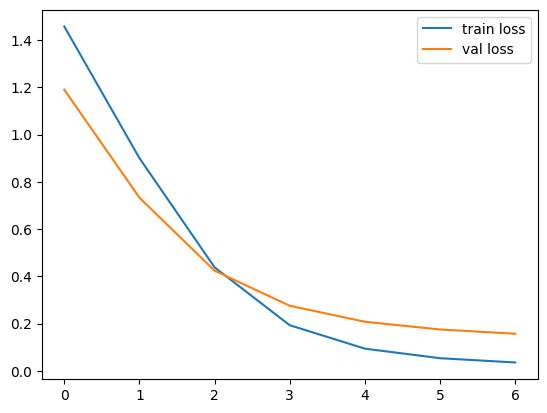

In [19]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="train loss")
plt.plot(r.history["val_loss"], label="val loss")
plt.legend();

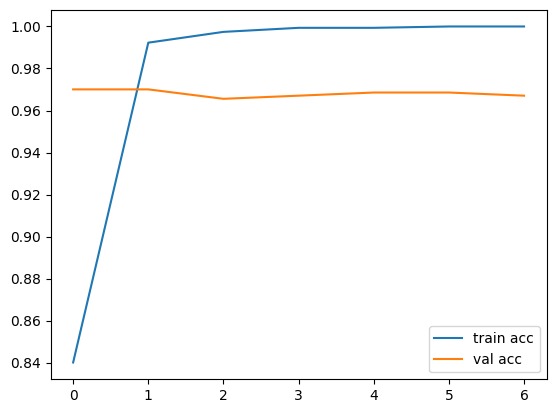

In [20]:
# Plot accuracy per iteration
plt.plot(r.history["accuracy"], label="train acc")
plt.plot(r.history["val_accuracy"], label="val acc")
plt.legend();

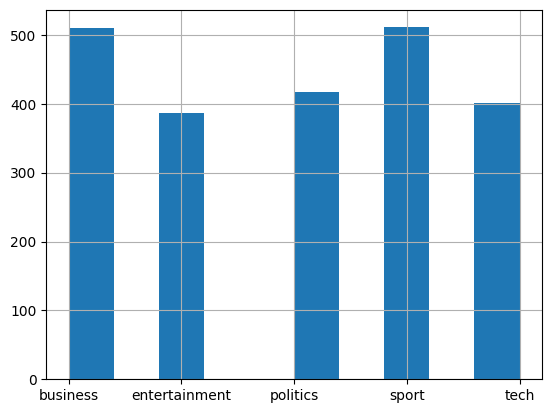

In [21]:
df["labels"].hist();